Import relevant libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
from scipy import stats

ModuleNotFoundError: No module named 'pandas'

Importing the necessary dataset, in this case the dataset concerned with Country Benin.

In [15]:
data_frame = pd.read_csv(r'benin-malanville.csv')

NameError: name 'pd' is not defined

Brief description about the dataset. This includes the shape, head and tail, data types and a general overview of the dataset. Starting from the shape of the data i am going to proceed respectively.

In [14]:
data_frame.shape

NameError: name 'data_frame' is not defined

In [ ]:
data_frame.head

<bound method NDFrame.head of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        W

In [ ]:
# List of each column in the dataset.
data_frame.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [ ]:
# View of the data types of each column.
data_frame.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [ ]:
data_frame.describe

<bound method NDFrame.describe of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

     

Data preparation stage

Out of the given 19 metrics in the dataset i have chosen to only consider 8 metrics as they are the most relevant metrics for our analysis and ultimately business objectives.The key columns(KPIs) that i have considered are:

1.GHI(W/m2): is a metric which indicates the total sunlight that was recieved on a surface. I consider this metric very significant to the analysis since it directly indicates optimal solar panel locations with immense potential for generating solar energy.

2.DNI(W/m2): This metric indicates areas with low interference by clouds and atmospheric pressure.Areas having high DNI values are ideal for installing solar panels.

3.DHI(W/m2): This metric aids in assessing solar potential even in areas with cloud cover or atmospheric scattering. It shows overall sunlight availability.

4.Tamb(°C): The temprature of air is crucial and has an immmense effect on the efficiency of solar panels because extreme temprature resuces their performance. So, this metrics helps us in selecting areas with optimal temprature ranges.

5.RH(% - Relative Humidity): This metric indicates humidity levels which is a key factor in the performance of solar panels. This is because in areas with high humidity it leads to decreased effectiveness due to condensation.

6.WS(m/s) and WSgust(m/s): This metric helps us assess and locate areas with lower wind speed and gust as these areas are ideal because they can support solar installations without excessive damage.

7.Precipitation(mm/min): This metric helps us in selecting drier areas which are optimal for loacting solar panels. This is becasue high precipitation goes hand in hand with reduced sunlight and increased maintenance cost.

8.TModa(°C) and TModb(°C): This metrics are key for the fact that they indicate the performance of the sensors in different environments and the condition inturn affecting the solar measurements are tracked.

9.WSstdev: The standard deviation of wind speed is a useful tool for calculating the variations in wind speed over time. High variability may be a sign of erratic wind conditions, which could affect how well solar panels function, particularly in terms of upkeep and durability.

In general, my justifications for choosing the above metrics are summarized below:
           -Sunlight Exposure(GHI, DNI and DHI)
           -Temprature(Tamb)
           -Humidity and Precipitation(RH, Precipitation)
           -Wind factors(WS and WSgust)
           
In the next stages i am going to continue with my prior basic exploration and analysis with only these 11 KPIs are going to be used for the comparison to select optimal areas to install solar panels. So, i am going to drop or subset the metrics that are irrelevant to the main analysis. I am going to use subseting sue to the reason that maybe i want to look at the other metrics in the end.

In [ ]:
# Subsetting the columns that i consider irrelevant to my analysis.
# Also re-assign the data_frame variable

df = data_frame[['Timestamp', 'GHI', 'DNI', 'DHI',
            'ModA', 'ModB', 
            'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev','Cleaning','WD',
            #'WDstdev', 'BP', 'Comments',
            'Precipitation','TModA', 'TModB',]].copy()

In [ ]:
# Checking the number of coulmns included.
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'Cleaning', 'WD', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')

In [ ]:
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
Cleaning           int64
WD               float64
Precipitation    float64
TModA            float64
TModB            float64
dtype: object

In [ ]:
# The time stamp shouldn't be an object so i am going to convert it to a datetime coulmn.
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
# look for missing values.
df.isna().sum()
# All our metrics have no missing values.

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
Cleaning         0
WD               0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [ ]:
# Look for duplicated values.
df.loc[df.duplicated()]
# None of our values are duplicated.

Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, Cleaning, WD, Precipitation, TModA, TModB]
Index: []

Statistical insight
First we are going to present a summary statistics.

In [ ]:
# Summary statistics
df.describe()

Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         1.600000       4.500000       4.300000      28.000000   
75%       216.300000     463.700000     447.900000      32.300000   
max       759.200000    1342.300000    1342.300000      43.800000   
std       158.691074     326.894859     316.536515       5.924297   

                  RH             WS         WSgust        WSstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean       54.487969       2.121113       2.809195       0.473390   
min         2.100000       0.000000       0.000000       0.000000   
25%        28.800000       1.000000       1.300000       0.400000   
50%        55.100000       1.900000       2.600000       0.500000   
75%        80.100000       3.100000       4.100000       0.600000   
max       100.000000      19.500000      26.600000       4.200000   
std        28.073069       1.603466       2.029120       0.273395   

            Cleaning             WD  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        0.000923     153.435172       0.001905      35.246026   
min         0.000000       0.000000       0.000000       9.000000   
25%         0.000000      59.000000       0.000000      24.200000   
50%         0.000000     181.000000       0.000000      30.000000   
75%         0.000000     235.100000       0.000000      46.900000   
max         1.000000     360.000000       2.500000      81.000000   
std         0.030363     102.332842       0.037115      14.807258   

               TModB  
count  525600.000000  
mean       32.471736  
min         8.100000  
25%        23.600000  
50%        28.900000  
75%        41.500000  
max        72.500000  
std        12.348743

In [ ]:
columns = ['Timestamp', 'GHI', 'DNI', 'DHI',
            'ModA', 'ModB', 
            'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'Precipitation','TModA', 'TModB','Cleaning'].copy()
def remove_outliers_iqr(df, columns):
    """
    Remove outliers from specified columns using IQR method.

    Parameters:
    df (pd.DataFrame): The DataFrame from which to remove outliers.
    columns (list): List of column names to apply outlier removal.

    Returns:
    pd.DataFrame: DataFrame with outliers removed from specified columns.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = df.copy()

    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned




In [ ]:
# Statistical check for outliers using the summary statistics.
df.describe()

Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         1.600000       4.500000       4.300000      28.000000   
75%       216.300000     463.700000     447.900000      32.300000   
max       759.200000    1342.300000    1342.300000      43.800000   
std       158.691074     326.894859     316.536515       5.924297   

                  RH             WS         WSgust        WSstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean       54.487969       2.121113       2.809195       0.473390   
min         2.100000       0.000000       0.000000       0.000000   
25%        28.800000       1.000000       1.300000       0.400000   
50%        55.100000       1.900000       2.600000       0.500000   
75%        80.100000       3.100000       4.100000       0.600000   
max       100.000000      19.500000      26.600000       4.200000   
std        28.073069       1.603466       2.029120       0.273395   

            Cleaning             WD  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        0.000923     153.435172       0.001905      35.246026   
min         0.000000       0.000000       0.000000       9.000000   
25%         0.000000      59.000000       0.000000      24.200000   
50%         0.000000     181.000000       0.000000      30.000000   
75%         0.000000     235.100000       0.000000      46.900000   
max         1.000000     360.000000       2.500000      81.000000   
std         0.030363     102.332842       0.037115      14.807258   

               TModB  
count  525600.000000  
mean       32.471736  
min         8.100000  
25%        23.600000  
50%        28.900000  
75%        41.500000  
max        72.500000  
std        12.348743

After removing the outliers and being done with the data cleaning and basic understanding stages let's proceed to the analysis part. We start by conducting a time series analysis to show trends by days and months.

In [ ]:
print(df.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'Cleaning', 'WD', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')


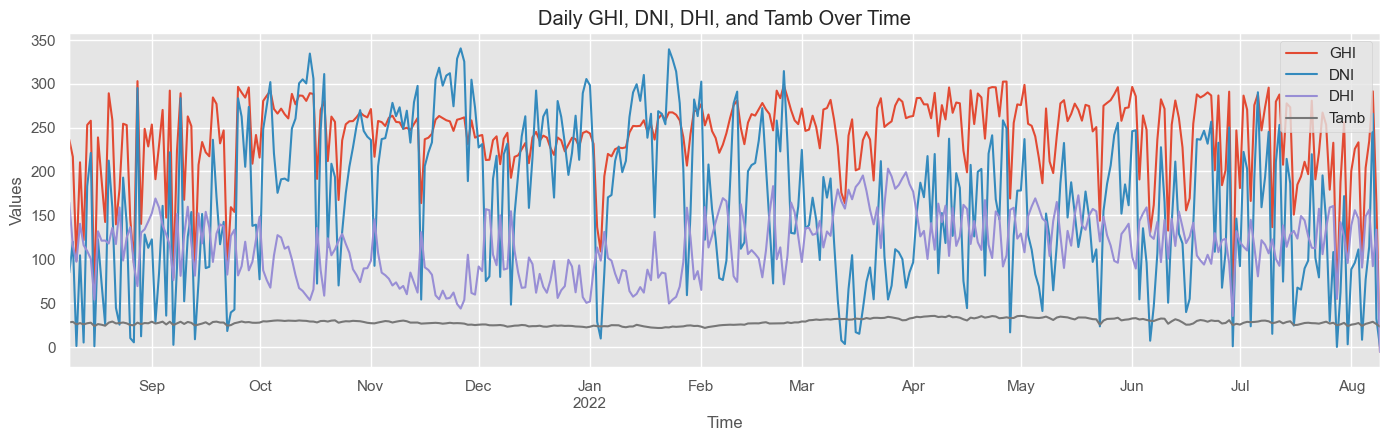

In [ ]:
# Set 'Timestamp' as the index for easier time series plotting
df.set_index('Timestamp', inplace=True)

# Resample the data by day or month to observe patterns (optional: you can resample by hour as well)
df_daily = df.resample('D').mean()
df_monthly = df.resample('M').mean()

# Plotting GHI, DNI, DHI, and Tamb over time (using daily resampled data)
plt.figure(figsize=(14, 8))

# Line plot for GHI, DNI, DHI, and Tamb
plt.subplot(2, 1, 1)
df_daily[['GHI', 'DNI', 'DHI', 'Tamb']].plot(ax=plt.gca(), linewidth=1.5)
plt.title('Daily GHI, DNI, DHI, and Tamb Over Time')
plt.ylabel('Values')
plt.xlabel('Time')
plt.grid(True)

plt.tight_layout()
plt.show()



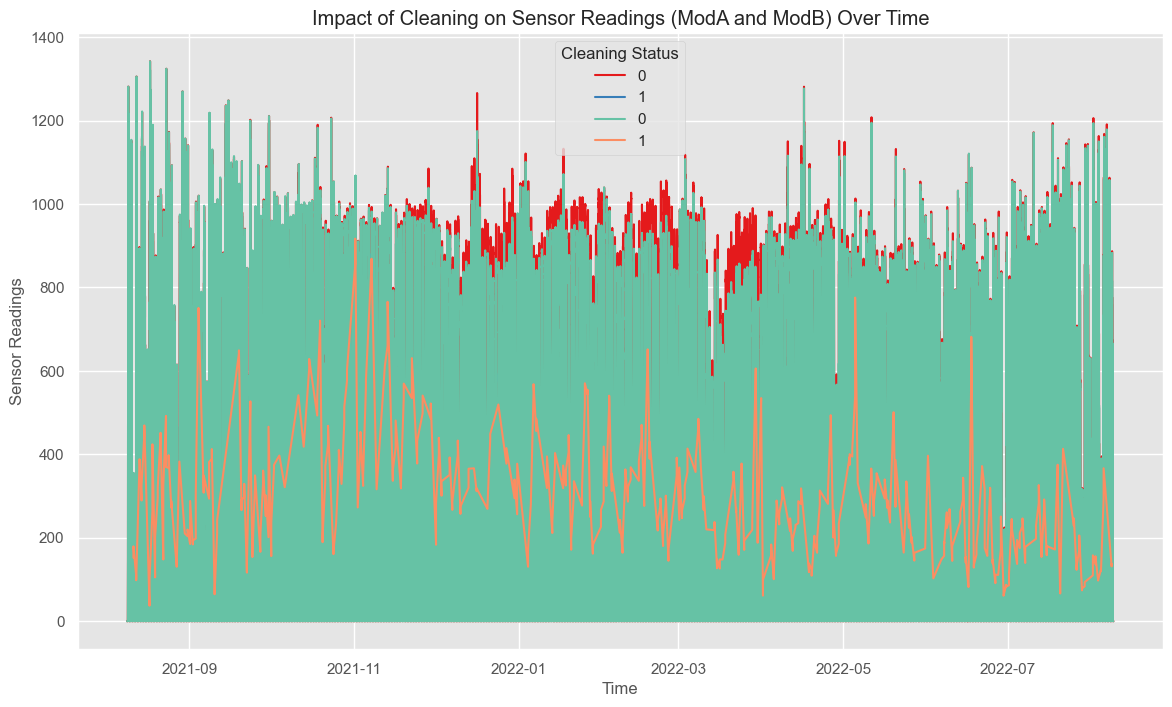

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'Cleaning' column exists
if 'Cleaning' not in df.columns:
    raise KeyError("The 'Cleaning' column is not present in the DataFrame.")

# Check if 'Timestamp' column is set as index; if not, set it
if df.index.name != 'Timestamp':
    df.set_index('Timestamp', inplace=True)

# Define the figure size
plt.figure(figsize=(14, 8))

# Plot ModA and ModB sensor readings over time, colored by the 'Cleaning' column
sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning', palette='Set1', linewidth=1.5)
sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning', palette='Set2', linewidth=1.5)

# Add titles and labels
plt.title('Impact of Cleaning on Sensor Readings (ModA and ModB) Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.legend(title='Cleaning Status')
plt.grid(True)

# Show the plot
plt.show()


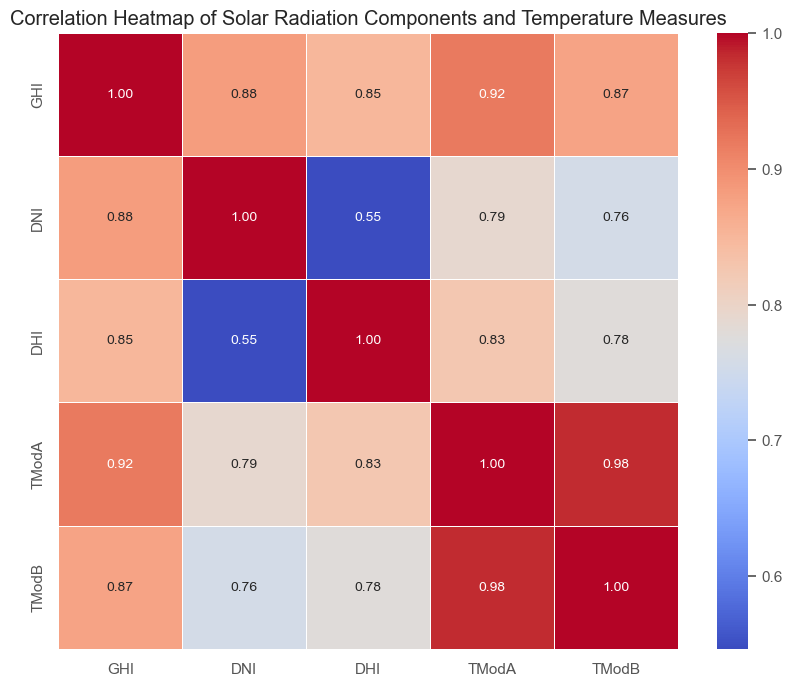

C:\Users\Beab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


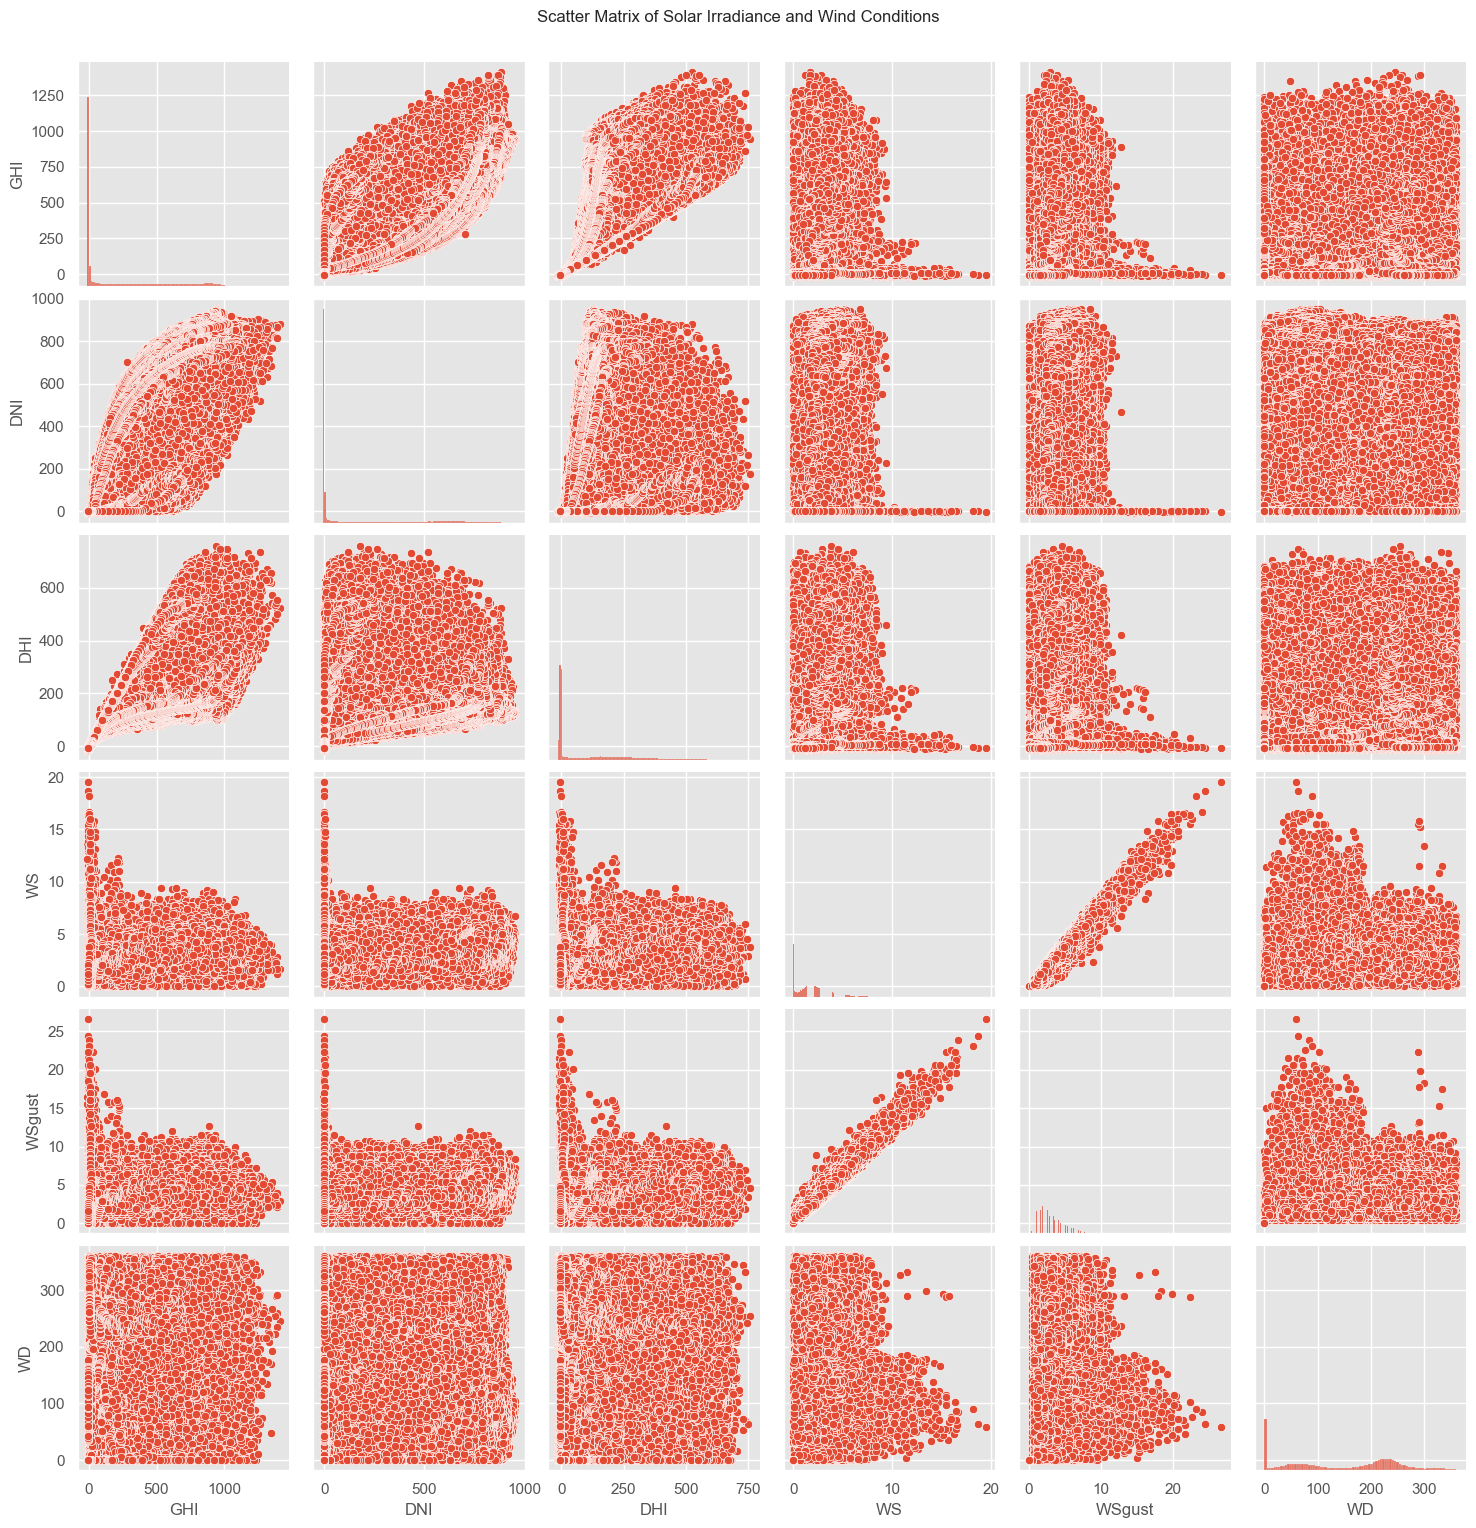

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Correlation Analysis
# Select relevant columns for correlation analysis
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_data = df[corr_columns]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Solar Radiation Components and Temperature Measures')
plt.show()

# Scatter Matrix Analysis
# Select columns for scatter matrix analysis
scatter_columns = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']
scatter_data = df[scatter_columns]

# Plot scatter matrix (pairplot) to investigate relationships
sns.pairplot(scatter_data)
plt.suptitle('Scatter Matrix of Solar Irradiance and Wind Conditions', y=1.02)
plt.show()


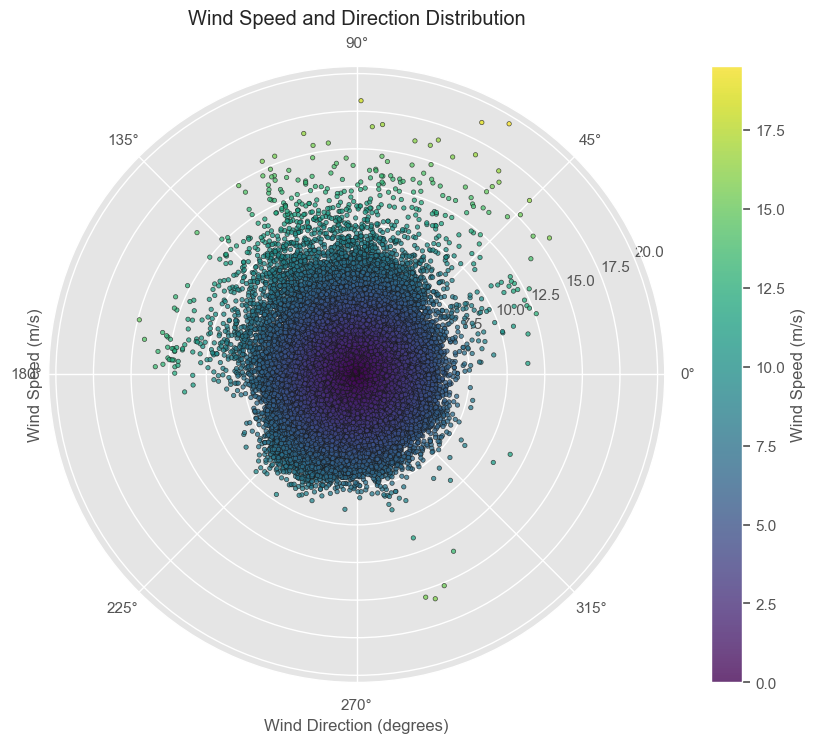

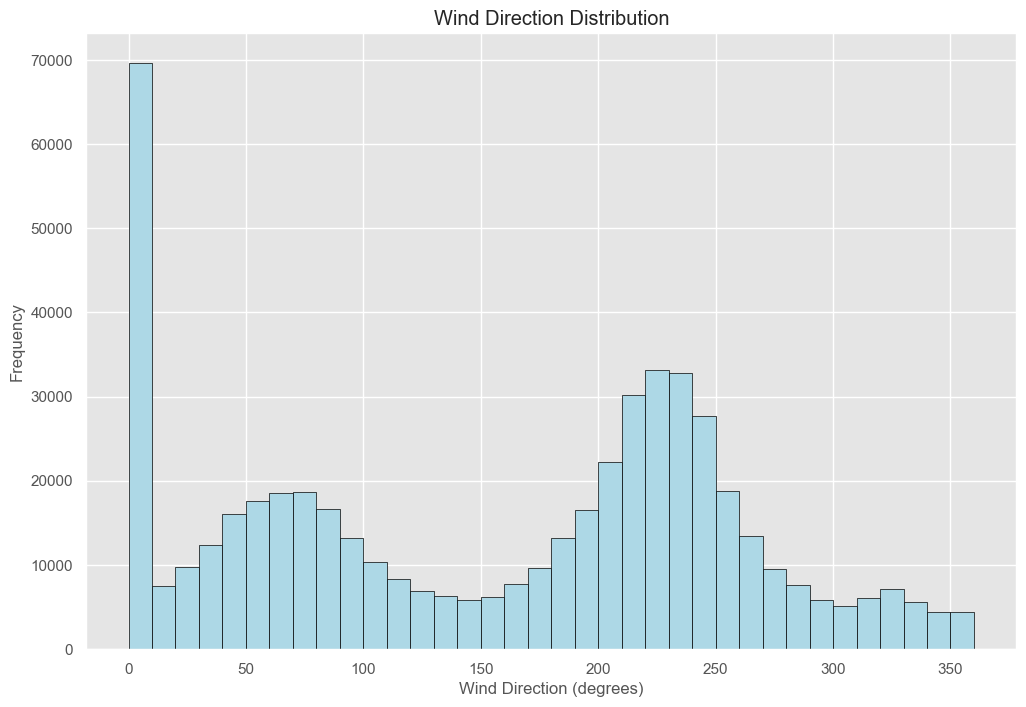

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ensure you have the relevant columns in the DataFrame
required_columns = ['WS', 'WD']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Convert wind direction to radians for polar plotting
df['WD_rad'] = np.deg2rad(df['WD'])

# Plotting Wind Speed vs. Wind Direction (Polar Plot)
plt.figure(figsize=(12, 8))

# Create polar plot for wind speed distribution
ax = plt.subplot(1, 1, 1, projection='polar')
c = ax.scatter(df['WD_rad'], df['WS'], c=df['WS'], cmap='viridis', s=10, alpha=0.75, edgecolors='k', linewidth=0.5)

# Add color bar
plt.colorbar(c, ax=ax, label='Wind Speed (m/s)')

# Customize plot
ax.set_title('Wind Speed and Direction Distribution', va='bottom')
ax.set_xlabel('Wind Direction (degrees)')
ax.set_ylabel('Wind Speed (m/s)')

plt.show()

# Plotting Wind Direction Variability
plt.figure(figsize=(12, 8))

# Create a histogram for wind direction to analyze variability
plt.hist(df['WD'], bins=36, edgecolor='black', color='lightblue')
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()


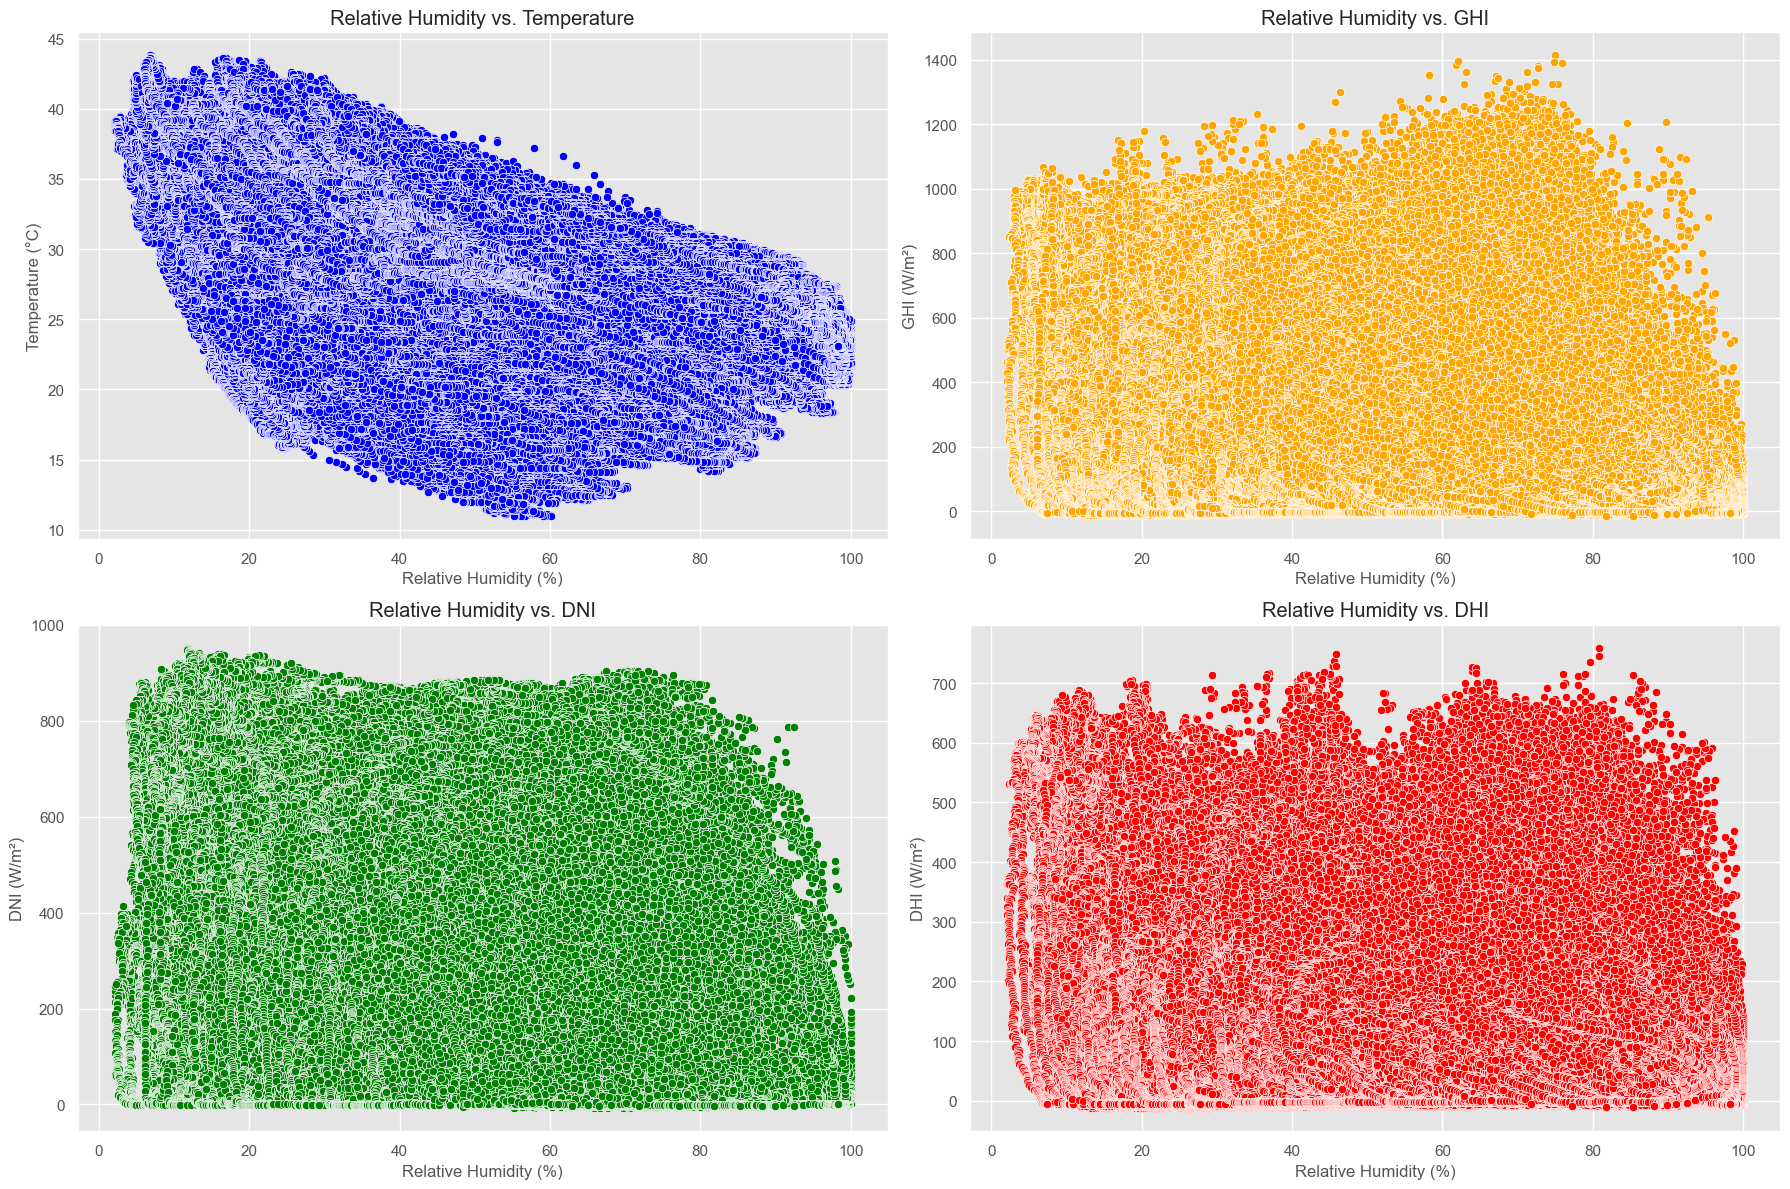

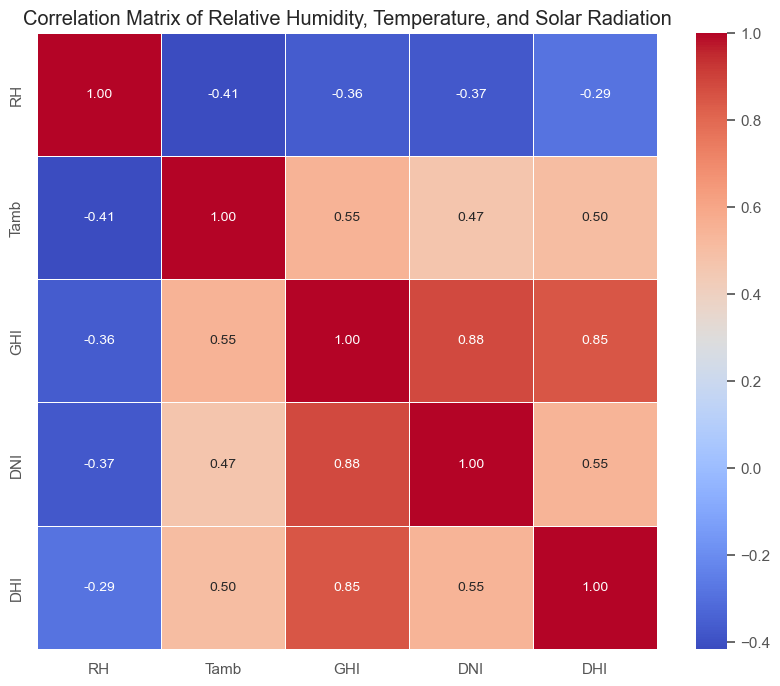

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure you have the relevant columns in the DataFrame
required_columns = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Set up the plotting area
plt.figure(figsize=(18, 12))

# Scatter plot for RH vs. Temperature (Tamb)
plt.subplot(2, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, color='blue')
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Scatter plot for RH vs. GHI (Global Horizontal Irradiance)
plt.subplot(2, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, color='orange')
plt.title('Relative Humidity vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# Scatter plot for RH vs. DNI (Direct Normal Irradiance)
plt.subplot(2, 2, 3)
sns.scatterplot(x='RH', y='DNI', data=df, color='green')
plt.title('Relative Humidity vs. DNI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m²)')
plt.grid(True)

# Scatter plot for RH vs. DHI (Diffuse Horizontal Irradiance)
plt.subplot(2, 2, 4)
sns.scatterplot(x='RH', y='DHI', data=df, color='red')
plt.title('Relative Humidity vs. DHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DHI (W/m²)')
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()

# Correlation matrix for RH, Temperature, and Solar Radiation
correlation_cols = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
correlation_matrix = df[correlation_cols].corr()

# Plot the heatmap for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Relative Humidity, Temperature, and Solar Radiation')
plt.show()


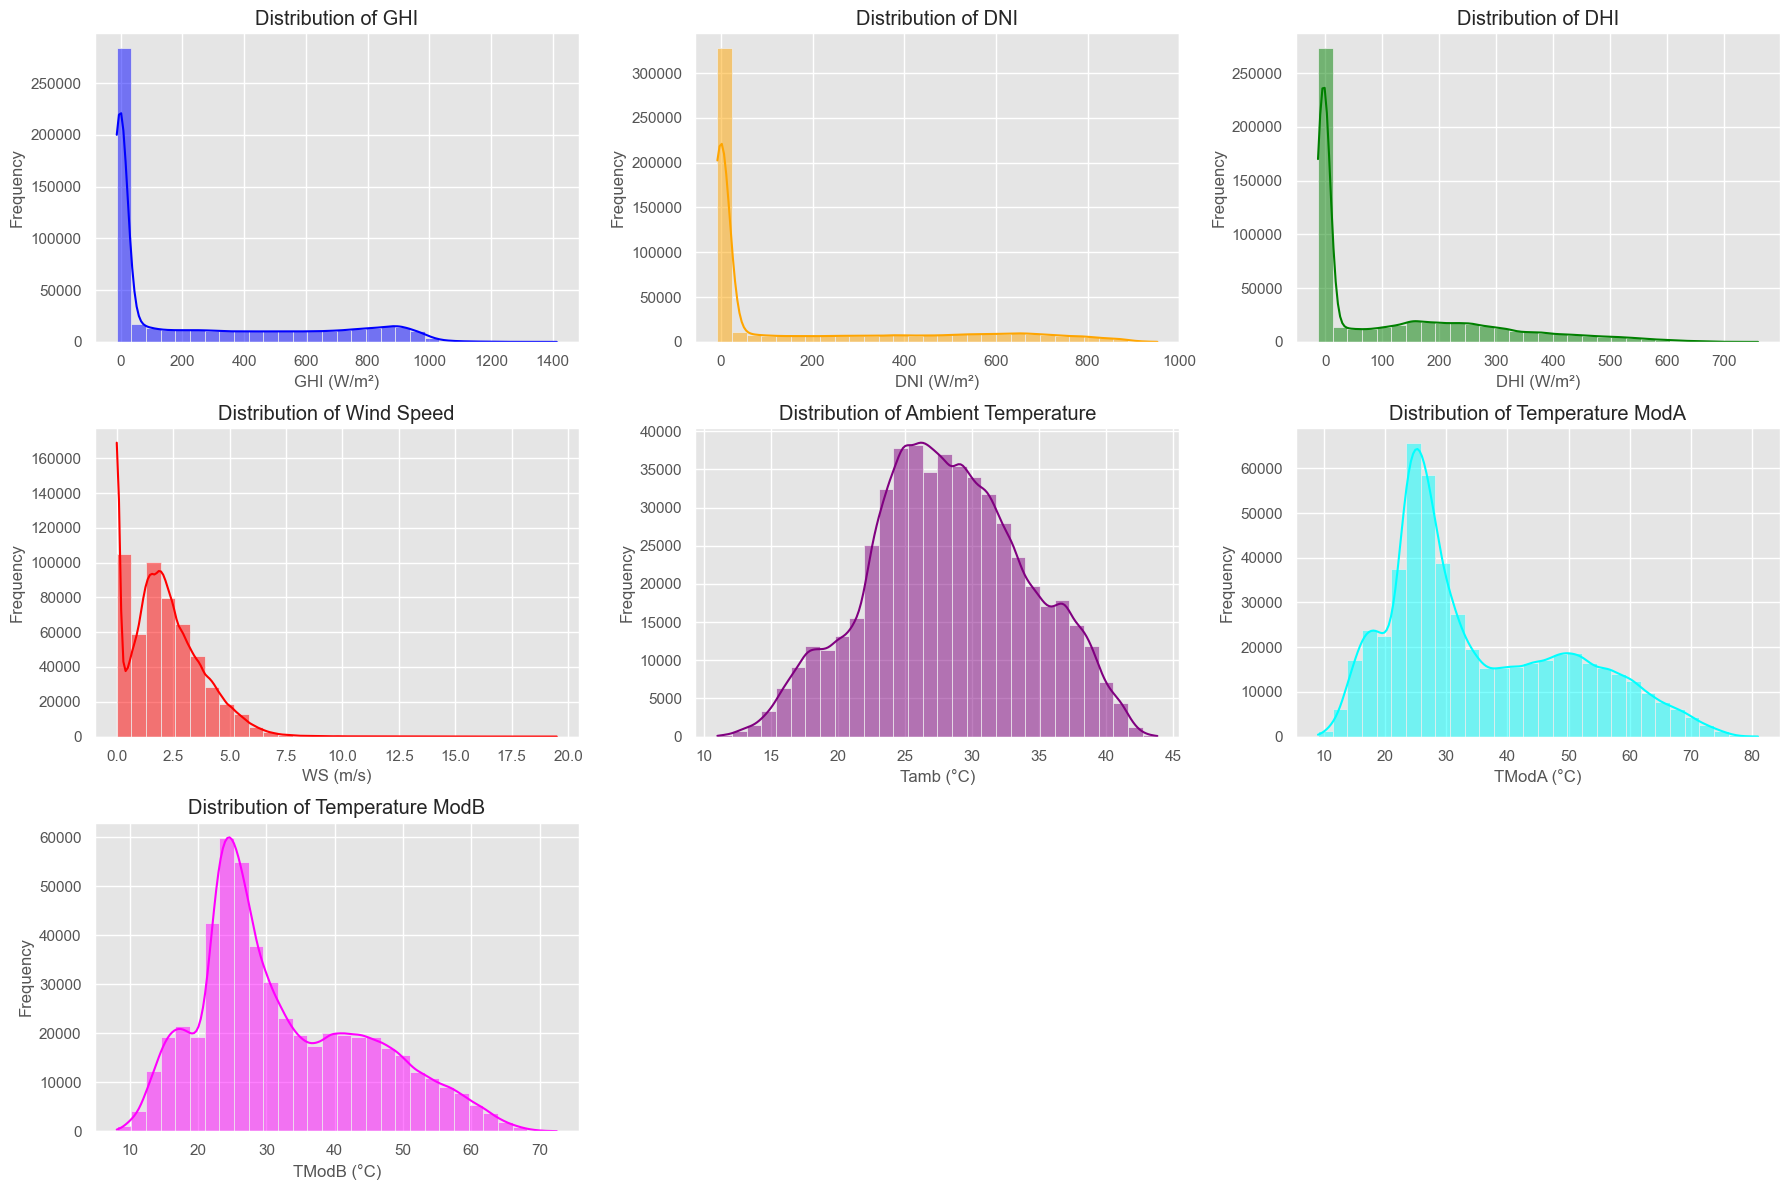

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Set up the plotting area
plt.figure(figsize=(18, 12))

# Histogram for GHI (Global Horizontal Irradiance)
plt.subplot(3, 3, 1)
sns.histplot(df['GHI'], bins=30, kde=True, color='blue')
plt.title('Distribution of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for DNI (Direct Normal Irradiance)
plt.subplot(3, 3, 2)
sns.histplot(df['DNI'], bins=30, kde=True, color='orange')
plt.title('Distribution of DNI')
plt.xlabel('DNI (W/m²)')
plt.ylabel('Frequency')

# Histogram for DHI (Diffuse Horizontal Irradiance)
plt.subplot(3, 3, 3)
sns.histplot(df['DHI'], bins=30, kde=True, color='green')
plt.title('Distribution of DHI')
plt.xlabel('DHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS (Wind Speed)
plt.subplot(3, 3, 4)
sns.histplot(df['WS'], bins=30, kde=True, color='red')
plt.title('Distribution of Wind Speed')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')

# Histogram for Tamb (Ambient Temperature)
plt.subplot(3, 3, 5)
sns.histplot(df['Tamb'], bins=30, kde=True, color='purple')
plt.title('Distribution of Ambient Temperature')
plt.xlabel('Tamb (°C)')
plt.ylabel('Frequency')

# Histogram for TModA (Temperature Sensor A)
plt.subplot(3, 3, 6)
sns.histplot(df['TModA'], bins=30, kde=True, color='cyan')
plt.title('Distribution of Temperature ModA')
plt.xlabel('TModA (°C)')
plt.ylabel('Frequency')

# Histogram for TModB (Temperature Sensor B)
plt.subplot(3, 3, 7)
sns.histplot(df['TModB'], bins=30, kde=True, color='magenta')
plt.title('Distribution of Temperature ModB')
plt.xlabel('TModB (°C)')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


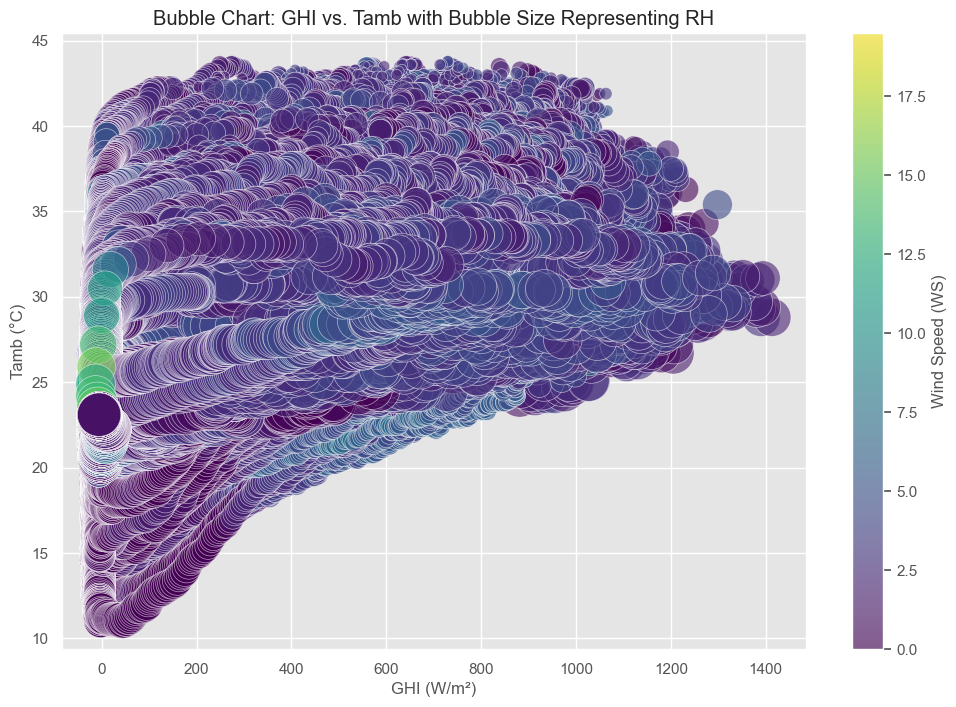

In [ ]:
import matplotlib.pyplot as plt

# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'Tamb', 'WS', 'RH']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Plot Bubble Chart
plt.figure(figsize=(12, 8))

# Scatter plot for GHI vs. Tamb with bubble size representing RH
plt.scatter(
    x=df['GHI'],              # X-axis: GHI (Global Horizontal Irradiance)
    y=df['Tamb'],             # Y-axis: Tamb (Ambient Temperature)
    s=df['RH'] * 10,          # Bubble size: RH (Relative Humidity) scaled for visibility
    c=df['WS'],               # Color by WS (Wind Speed)
    cmap='viridis',           # Colormap for Wind Speed
    alpha=0.6,                # Transparency level of bubbles
    edgecolors='w',           # White edge color for bubbles
    linewidth=0.5             # Edge line width
)

# Add color bar to indicate Wind Speed
plt.colorbar(label='Wind Speed (WS)')

# Add titles and labels
plt.title('Bubble Chart: GHI vs. Tamb with Bubble Size Representing RH')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')

# Show plot
plt.grid(True)
plt.show()
